<a href="https://colab.research.google.com/github/giclocate/scz-timeseries-analysis/blob/main/pesquisa_ic_spz_etl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install splot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.1/157.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.7/325.7 kB 23.7 MB/s eta 0:00:00


In [ ]:
!pip install tabula-py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 39.4 MB/s eta 0:00:00


# Extração das tabelas do Relatório trimestral 2015-2024

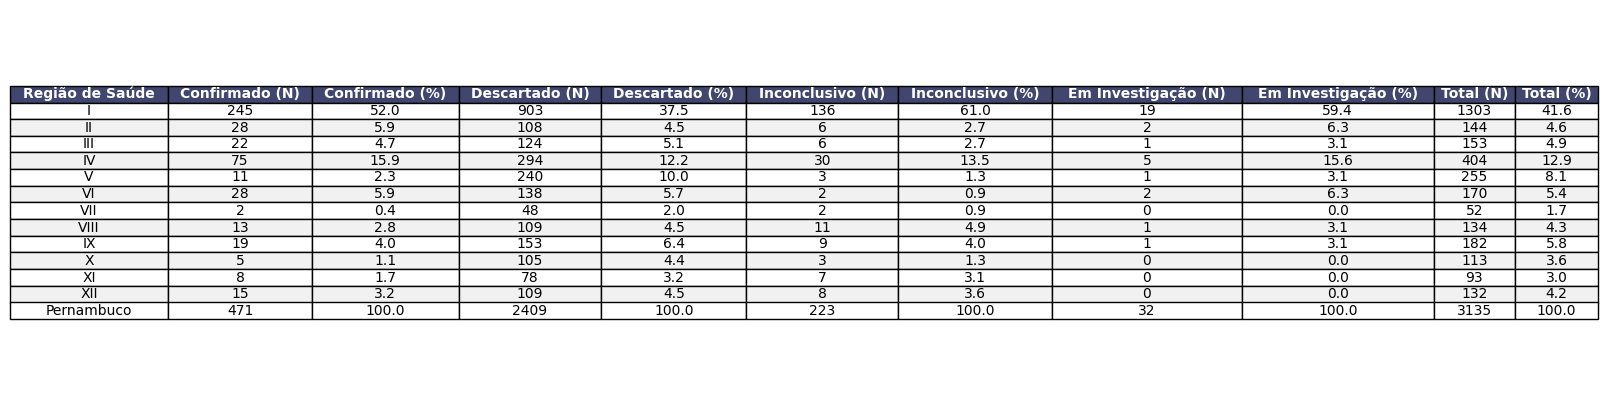

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


data = {
    "Região de Saúde": ["I","II","III","IV","V","VI","VII","VIII","IX","X","XI","XII","Pernambuco"],
    "Confirmado (N)": [245,28,22,75,11,28,2,13,19,5,8,15,471],
    "Confirmado (%)": [52.0,5.9,4.7,15.9,2.3,5.9,0.4,2.8,4.0,1.1,1.7,3.2,100.0],
    "Descartado (N)": [903,108,124,294,240,138,48,109,153,105,78,109,2409],
    "Descartado (%)": [37.5,4.5,5.1,12.2,10.0,5.7,2.0,4.5,6.4,4.4,3.2,4.5,100.0],
    "Inconclusivo (N)": [136,6,6,30,3,2,2,11,9,3,7,8,223],
    "Inconclusivo (%)": [61.0,2.7,2.7,13.5,1.3,0.9,0.9,4.9,4.0,1.3,3.1,3.6,100.0],
    "Em Investigação (N)": [19,2,1,5,1,2,0,1,1,0,0,0,32],
    "Em Investigação (%)": [59.4,6.3,3.1,15.6,3.1,6.3,0.0,3.1,3.1,0.0,0.0,0.0,100.0],
    "Total (N)": [1303,144,153,404,255,170,52,134,182,113,93,132,3135],
    "Total (%)": [41.6,4.6,4.9,12.9,8.1,5.4,1.7,4.3,5.8,3.6,3.0,4.2,100.0]
}

df = pd.DataFrame(data)
df.to_csv("scz_pernambuco_tabela1.csv", index=False)


# Configurações da figura
fig, ax = plt.subplots(figsize=(15, 5))  # Ajuste o tamanho conforme necessidade
ax.axis('off')

# Cria a tabela
table = ax.table(cellText=df.values,
                 colLabels=df.columns,
                 cellLoc='center',
                 loc='center')

# Estilizando a tabela
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df.columns))))

# Cores para cabeçalho
for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_facecolor('#40466e')
        cell.set_text_props(color='w', weight='bold')
    else:
        cell.set_edgecolor('black')
        if i % 2 == 0:
            cell.set_facecolor('#f1f1f2')
        else:
            cell.set_facecolor('white')

# Salvar como PNG
plt.savefig("scz_pernambuco_tabela1.png", dpi=300, bbox_inches='tight')
plt.show()

In [2]:
display(df) #Distribuição dos casos de SCZ segundo classificação final e Região de Saúdev de Residência.

,Região de Saúde,Confirmado (N),Confirmado (%),Descartado (N),Descartado (%),Inconclusivo (N),Inconclusivo (%),Em Investigação (N),Em Investigação (%),Total (N),Total (%)
0,I,245,52.0,903,37.5,136,61.0,19,59.4,1303,41.6
1,II,28,5.9,108,4.5,6,2.7,2,6.3,144,4.6
2,III,22,4.7,124,5.1,6,2.7,1,3.1,153,4.9
3,IV,75,15.9,294,12.2,30,13.5,5,15.6,404,12.9
4,V,11,2.3,240,10.0,3,1.3,1,3.1,255,8.1
5,VI,28,5.9,138,5.7,2,0.9,2,6.3,170,5.4
6,VII,2,0.4,48,2.0,2,0.9,0,0.0,52,1.7
7,VIII,13,2.8,109,4.5,11,4.9,1,3.1,134,4.3
8,IX,19,4.0,153,6.4,9,4.0,1,3.1,182,5.8
9,X,5,1.1,105,4.4,3,1.3,0,0.0,113,3.6


In [3]:
import pandas as pd

data = {
    "Classificação": ["Confirmado","Descartado","Inconclusivo","Em Investigação","Total"],
    "2015 (N)": [265,837,46,0,1148],
    "2015 (%)": [23.1,72.9,4.0,0.0,100.0],
    "2016 (N)": [159,869,59,0,1087],
    "2016 (%)": [14.6,79.9,5.4,0.0,100.0],
    "2017 (N)": [19,153,22,0,194],
    "2017 (%)": [9.8,78.9,11.3,0.0,100.0],
    "2018 (N)": [18,154,22,1,195],
    "2018 (%)": [9.2,79.0,11.3,0.5,100.0],
    "2019 (N)": [7,156,26,0,189],
    "2019 (%)": [3.7,82.5,13.8,0.0,100.0],
    "2020 (N)": [0,109,8,0,117],
    "2020 (%)": [0.0,93.2,6.8,0.0,100.0],
    "2021 (N)": [1,57,13,0,71],
    "2021 (%)": [1.4,80.3,18.3,0.0,100.0],
    "2022 (N)": [1,29,9,2,41],
    "2022 (%)": [2.4,70.7,22.0,4.9,100.0],
    "2023 (N)": [0,37,11,1,49],
    "2023 (%)": [0.0,75.5,22.4,2.0,100.0],
    "2024 (N)": [0,9,7,28,44],
    "2024 (%)": [0.0,20.5,15.9,63.6,100.0],
    "Total (N)": [471,2409,223,32,3135],
    "Total (%)": [15.0,76.9,7.1,1.0,100.0]
}

df2 = pd.DataFrame(data)
df2.to_csv("scz_pernambuco_tabela2.csv", index=False)

In [4]:
display(df2)

,Classificação,2015 (N),2015 (%),2016 (N),2016 (%),2017 (N),2017 (%),2018 (N),2018 (%),2019 (N),...,2021 (N),2021 (%),2022 (N),2022 (%),2023 (N),2023 (%),2024 (N),2024 (%),Total (N),Total (%)
0,Confirmado,265,23.1,159,14.6,19,9.8,18,9.2,7,...,1,1.4,1,2.4,0,0.0,0,0.0,471,15.0
1,Descartado,837,72.9,869,79.9,153,78.9,154,79.0,156,...,57,80.3,29,70.7,37,75.5,9,20.5,2409,76.9
2,Inconclusivo,46,4.0,59,5.4,22,11.3,22,11.3,26,...,13,18.3,9,22.0,11,22.4,7,15.9,223,7.1
3,Em Investigação,0,0.0,0,0.0,0,0.0,1,0.5,0,...,0,0.0,2,4.9,1,2.0,28,63.6,32,1.0
4,Total,1148,100.0,1087,100.0,194,100.0,195,100.0,189,...,71,100.0,41,100.0,49,100.0,44,100.0,3135,100.0


In [5]:
import pandas as pd

# Dados originais
data = {
    "Categoria": [
        "Tipo de Notificação (n=3145)","Tipo de Notificação (n=3145)","Tipo de Notificação (n=3145)","Tipo de Notificação (n=3145)",
        "Sexo (n=3145)","Sexo (n=3145)","Sexo (n=3145)",
        "Presença de Microcefalia (n=3145)","Presença de Microcefalia (n=3145)","Presença de Microcefalia (n=3145)","Presença de Microcefalia (n=3145)"
    ],
    "Variáveis": [
        "Criança com microcefalia e/ou alteração do SNC (>28 dias)",
        "Recém-nascido com microcefalia (≤28 dias)",
        "Natimorto com microcefalia e/ou alteração do SNC",
        "Feto em risco",
        "Feminino","Masculino","Não informado",
        "Não atende às definições de microcefalia",
        "Microcefalia",
        "Microcefalia severa",
        "Ignorado"
    ],
    "N": [256,2814,64,1,1903,1198,34,1257,939,669,270],
    "%": [8.2,89.8,2.0,0.0,60.7,38.2,1.1,40.1,30.0,21.3,8.6]
}

df3 = pd.DataFrame(data)

# Quebrar por categoria
df_tipo = df3[df3["Categoria"].str.contains("Tipo de Notificação")][["Variáveis", "N", "%"]].reset_index(drop=True)
df_sexo = df3[df3["Categoria"].str.contains("Sexo")][["Variáveis", "N", "%"]].reset_index(drop=True)
df_micro = df3[df3["Categoria"].str.contains("Presença")][["Variáveis", "N", "%"]].reset_index(drop=True)

df3.to_csv("scz_pernambuco_tabela3.csv", index=False)

In [6]:
display(df_tipo)
display(df_sexo)
display(df_micro)

,Variáveis,N,%
0,Criança com microcefalia e/ou alteração do SNC...,256,8.2
1,Recém-nascido com microcefalia (≤28 dias),2814,89.8
2,Natimorto com microcefalia e/ou alteração do SNC,64,2.0
3,Feto em risco,1,0.0


,Variáveis,N,%
0,Feminino,1903,60.7
1,Masculino,1198,38.2
2,Não informado,34,1.1


,Variáveis,N,%
0,Não atende às definições de microcefalia,1257,40.1
1,Microcefalia,939,30.0
2,Microcefalia severa,669,21.3
3,Ignorado,270,8.6


In [7]:
def salvar_tabela_png(df, titulo, nome_arquivo):
    # Aumenta o tamanho da figura — mais larga e proporcional à quantidade de linhas
    fig, ax = plt.subplots(figsize=(12, 0.8 * len(df) + 1.5))
    ax.axis('off')

    # Cria a tabela
    table = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc='center',
        loc='center'
    )

    # Estilo geral
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.auto_set_column_width(col=list(range(len(df.columns))))

    # Escala — aumenta a área ocupada pela tabela dentro da figura
    table.scale(0.3, 1.3)

    # Cabeçalho colorido e linhas alternadas
    for (i, j), cell in table.get_celld().items():
        if i == 0:
            cell.set_facecolor("#355070")  # Azul escuro
            cell.set_text_props(color="white", weight="bold")
        else:
            cell.set_edgecolor("black")
            cell.set_facecolor("#f2f2f2" if i % 2 == 0 else "white")

    # Salvar imagem com pouco espaço extra ao redor
    plt.savefig(nome_arquivo, dpi=200, bbox_inches="tight", pad_inches=0.05, transparent=False)
    plt.close(fig)

# === Gerar e salvar os PNGs ===
salvar_tabela_png(df_tipo, "Tabela — Tipo de Notificação (n=3145)", "tabela_tipo_notificacao.png")
salvar_tabela_png(df_sexo, "Tabela — Sexo (n=3145)", "tabela_sexo.png")
salvar_tabela_png(df_micro, "Tabela — Presença de Microcefalia (n=3145)", "tabela_microcefalia.png")


In [8]:
display(df3)

,Categoria,Variáveis,N,%
0,Tipo de Notificação (n=3145),Criança com microcefalia e/ou alteração do SNC...,256,8.2
1,Tipo de Notificação (n=3145),Recém-nascido com microcefalia (≤28 dias),2814,89.8
2,Tipo de Notificação (n=3145),Natimorto com microcefalia e/ou alteração do SNC,64,2.0
3,Tipo de Notificação (n=3145),Feto em risco,1,0.0
4,Sexo (n=3145),Feminino,1903,60.7
5,Sexo (n=3145),Masculino,1198,38.2
6,Sexo (n=3145),Não informado,34,1.1
7,Presença de Microcefalia (n=3145),Não atende às definições de microcefalia,1257,40.1
8,Presença de Microcefalia (n=3145),Microcefalia,939,30.0
9,Presença de Microcefalia (n=3145),Microcefalia severa,669,21.3


In [11]:
import geopandas as gpd

# Ler shapefile de Pernambuco
gdf_pe = gpd.read_file("/content/PE_Municipios_2024.shp")

print(gdf_pe.columns)
gdf_pe.info()
print(gdf_pe.head())
display(gdf_pe)


Index(['CD_MUN', 'NM_MUN', 'CD_RGI', 'NM_RGI', 'CD_RGINT', 'NM_RGINT', 'CD_UF',
       'NM_UF', 'SIGLA_UF', 'CD_REGIA', 'NM_REGIA', 'SIGLA_RG', 'CD_CONCU',
       'NM_CONCU', 'AREA_KM2', 'geometry'],
      dtype='object')
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CD_MUN    185 non-null    object  
 1   NM_MUN    185 non-null    object  
 2   CD_RGI    185 non-null    object  
 3   NM_RGI    185 non-null    object  
 4   CD_RGINT  185 non-null    object  
 5   NM_RGINT  185 non-null    object  
 6   CD_UF     185 non-null    object  
 7   NM_UF     185 non-null    object  
 8   SIGLA_UF  185 non-null    object  
 9   CD_REGIA  185 non-null    object  
 10  NM_REGIA  185 non-null    object  
 11  SIGLA_RG  185 non-null    object  
 12  CD_CONCU  19 non-null     object  
 13  NM_CONCU  19 non-null     object  
 14  AREA_KM2  185 non-nu

,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,NM_REGIA,SIGLA_RG,CD_CONCU,NM_CONCU,AREA_KM2,geometry
0,2611903,Rio Formoso,260007,Barreiros - Sirinhaém,2601,Recife,26,Pernambuco,PE,2,Nordeste,NE,None,None,227.458,"POLYGON ((-35.17024 -8.72331, -35.17122 -8.722..."
1,2602100,Bom Conselho,260010,Garanhuns,2602,Caruaru,26,Pernambuco,PE,2,Nordeste,NE,None,None,790.774,"POLYGON ((-36.61507 -9.33029, -36.61562 -9.329..."
2,2610202,Panelas,260009,Caruaru,2602,Caruaru,26,Pernambuco,PE,2,Nordeste,NE,None,None,380.428,"POLYGON ((-35.97383 -8.67936, -35.97385 -8.679..."
3,2612802,Santa Terezinha,260014,Afogados da Ingazeira,2603,Serra Talhada,26,Pernambuco,PE,2,Nordeste,NE,None,None,200.327,"POLYGON ((-37.50021 -7.40839, -37.49953 -7.407..."
4,2611507,Quipapá,260010,Garanhuns,2602,Caruaru,26,Pernambuco,PE,2,Nordeste,NE,None,None,230.617,"POLYGON ((-36.01794 -8.91125, -36.02641 -8.907..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,2607752,Itapissuma,260001,Recife,2601,Recife,26,Pernambuco,PE,2,Nordeste,NE,2611606,Recife/PE,73.968,"POLYGON ((-34.89374 -7.69704, -34.89527 -7.697..."
181,2603405,Calumbi,260013,Serra Talhada,2603,Serra Talhada,26,Pernambuco,PE,2,Nordeste,NE,None,None,179.314,"POLYGON ((-38.06341 -8.09314, -38.06342 -8.093..."
182,2608206,Joaquim Nabuco,260003,Palmares,2601,Recife,26,Pernambuco,PE,2,Nordeste,NE,None,None,122.605,"POLYGON ((-35.54407 -8.64318, -35.54454 -8.643..."
183,2608255,Jucati,260010,Garanhuns,2602,Caruaru,26,Pernambuco,PE,2,Nordeste,NE,None,None,120.167,"POLYGON ((-36.42695 -8.71146, -36.42676 -8.711..."


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from scipy import stats
from scipy.stats import chi2_contingency, spearmanr
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Carregar tabelas
df_regional = pd.read_csv("scz_pernambuco_tabela1.csv")
df_temporal = pd.read_csv("scz_pernambuco_tabela2.csv")
df_caracteristicas = pd.read_csv("scz_pernambuco_tabela3.csv")

# Carregar geodados (assumindo que você tem o arquivo)
gdf_municipios = gpd.read_file("/content/PE_Municipios_2024.shp")

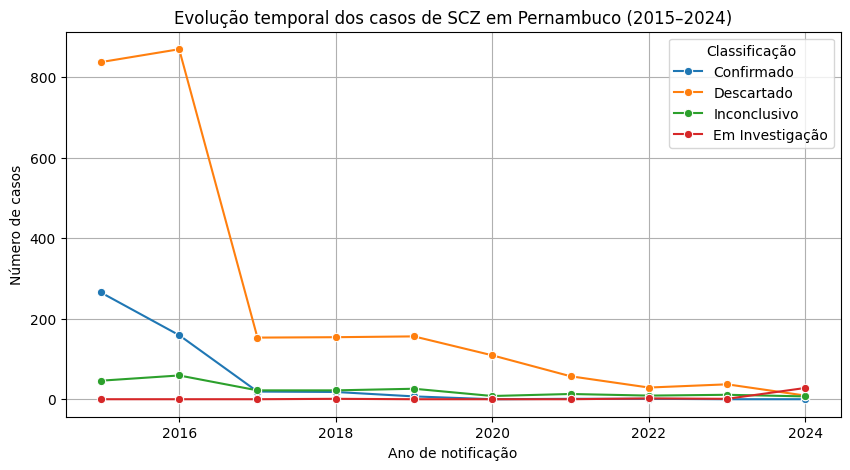

In [15]:
# Remover linha Total
df2 = df2[df2["Classificação"] != "Total"]

# Transformar de wide para long (para plotar)
df_long = df2.melt(
    id_vars="Classificação",
    value_vars=[c for c in df2.columns if "(N)" in c],
    var_name="Ano",
    value_name="Casos"
)

# Extract year and convert to integer, dropping rows where extraction failed
df_long["Ano"] = df_long["Ano"].str.extract(r"(\d{4})").astype(float) # Convert to float first to handle NaN
df_long = df_long.dropna(subset=["Ano"]) # Drop rows where year extraction failed
df_long["Ano"] = df_long["Ano"].astype(int) # Now convert to integer

# Gráfico de série temporal
plt.figure(figsize=(10,5))
sns.lineplot(data=df_long, x="Ano", y="Casos", hue="Classificação", marker="o")
plt.title("Evolução temporal dos casos de SCZ em Pernambuco (2015–2024)")
plt.ylabel("Número de casos")
plt.xlabel("Ano de notificação")
plt.grid(True)
plt.show()

In [17]:
# Carregar shapefile (ajuste o nome se necessário)
gdf = gpd.read_file("/content/PE_Municipios_2024.shp")

# Se o shapefile for nacional, filtrar só Pernambuco (CD_UF = 26)
if "CD_UF" in gdf.columns:
    gdf = gdf[gdf["CD_UF"] == "26"]

# Conferir colunas e nomes de municípios
print(gdf.columns)

Index(['CD_MUN', 'NM_MUN', 'CD_RGI', 'NM_RGI', 'CD_RGINT', 'NM_RGINT', 'CD_UF',
       'NM_UF', 'SIGLA_UF', 'CD_REGIA', 'NM_REGIA', 'SIGLA_RG', 'CD_CONCU',
       'NM_CONCU', 'AREA_KM2', 'geometry'],
      dtype='object')


In [19]:
import geopandas as gpd

gdf = gpd.read_file("/content/PE_Municipios_2024.shp")

print("Regiões de Saúde (NM_RGI):")
print(gdf["NM_RGI"].unique())

print("\nMacrorregiões de Saúde (NM_RGINT):")
print(gdf["NM_RGINT"].unique())


Regiões de Saúde (NM_RGI):
['Barreiros - Sirinhaém' 'Garanhuns' 'Caruaru' 'Afogados da Ingazeira'
 'Escada - Ribeirão' 'Goiana - Timbaúba' 'Serra Talhada' 'Palmares'
 'Salgueiro' 'Petrolina' 'Vitória de Santo Antão' 'Surubim' 'Recife'
 'Belo Jardim - Pesqueira' 'Arcoverde' 'Limoeiro' 'Carpina' 'Araripina']

Macrorregiões de Saúde (NM_RGINT):
['Recife' 'Caruaru' 'Serra Talhada' 'Petrolina']


In [20]:
mapa_regioes = {
  "I": ["Recife"],
  "II": ["Limoeiro", "Garanhuns"],
  "IV": ["Caruaru", "Belo Jardim - Pesqueira", "Surubim"],
  "V": ["Vitória de Santo Antão", "Escada - Ribeirão"],
  "VI": ["Palmares"],
  "VII": ["Arcoverde"],
  "VIII": ["Salgueiro"],
  "IX": ["Petrolina", "Araripina"],
  "X": ["Afogados da Ingazeira"],
  "XI": ["Serra Talhada"],
  "XII": ["Goiana - Timbaúba", "Barreiros - Sirinhaém", "Carpina"]
}

# Create a new mapping dictionary with macrorregiões as keys and Região de Saúde as values
macro_to_regiao_map = {}
for regiao, macros in mapa_regioes.items():
    for macro in macros:
        macro_to_regiao_map[macro] = regiao

# Apply the new mapping to the 'NM_RGINT' column
gdf["Região de Saúde"] = gdf["NM_RGINT"].map(macro_to_regiao_map)

gdf.head()

,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,NM_REGIA,SIGLA_RG,CD_CONCU,NM_CONCU,AREA_KM2,geometry,Região de Saúde
0,2611903,Rio Formoso,260007,Barreiros - Sirinhaém,2601,Recife,26,Pernambuco,PE,2,Nordeste,NE,None,None,227.458,"POLYGON ((-35.17024 -8.72331, -35.17122 -8.722...",I
1,2602100,Bom Conselho,260010,Garanhuns,2602,Caruaru,26,Pernambuco,PE,2,Nordeste,NE,None,None,790.774,"POLYGON ((-36.61507 -9.33029, -36.61562 -9.329...",IV
2,2610202,Panelas,260009,Caruaru,2602,Caruaru,26,Pernambuco,PE,2,Nordeste,NE,None,None,380.428,"POLYGON ((-35.97383 -8.67936, -35.97385 -8.679...",IV
3,2612802,Santa Terezinha,260014,Afogados da Ingazeira,2603,Serra Talhada,26,Pernambuco,PE,2,Nordeste,NE,None,None,200.327,"POLYGON ((-37.50021 -7.40839, -37.49953 -7.407...",XI
4,2611507,Quipapá,260010,Garanhuns,2602,Caruaru,26,Pernambuco,PE,2,Nordeste,NE,None,None,230.617,"POLYGON ((-36.01794 -8.91125, -36.02641 -8.907...",IV


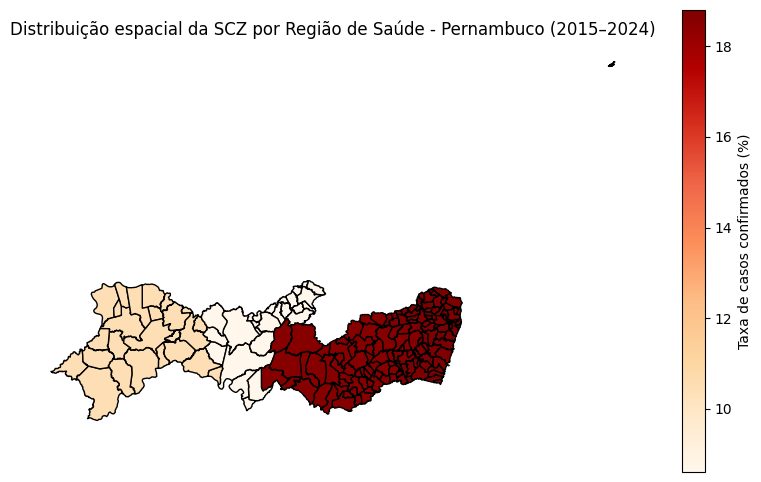

In [21]:
import pandas as pd

df1 = pd.read_csv("scz_pernambuco_tabela1.csv")

# Unir (merge) shapefile e dados
gdf_final = gdf.merge(df1, on="Região de Saúde", how="left")

# Calcular taxa de confirmados
gdf_final["Taxa Confirmados (%)"] = (
    gdf_final["Confirmado (N)"] / gdf_final["Total (N)"] * 100
)

# Plotar mapa final
gdf_final.plot(
    column="Taxa Confirmados (%)",
    cmap="OrRd",
    legend=True,
    edgecolor="black",
    legend_kwds={'label': "Taxa de casos confirmados (%)"},
    figsize=(10,6)
)
plt.title("Distribuição espacial da SCZ por Região de Saúde - Pernambuco (2015–2024)")
plt.axis("off")
plt.show()


# Testes temporais

In [25]:
from libpysal.weights import Queen
from esda.moran import Moran

gdf_final["Taxa Confirmados (%)"] = (
    gdf_final["Confirmado (N)"] / gdf_final["Total (N)"] * 100
)
gdf_final["Taxa Confirmados (%)"] = gdf_final["Taxa Confirmados (%)"].fillna(0)


w = Queen.from_dataframe(gdf_final)
w.transform = 'r'
mi = Moran(gdf_final["Taxa Confirmados (%)"], w)
print(f"Moran’s I: {mi.I:.3f}, p-valor: {mi.p_sim:.3f}")

('WARNING: ', 153, ' is an island (no neighbors)')
Moran’s I: 0.959, p-valor: 0.001


In [ ]:
from scipy.stats import chi2_contingency

tabela = pd.crosstab(df1["Região de Saúde"], df1["Confirmado (N)"])
chi2, p, dof, expected = chi2_contingency(tabela)
print(f"Qui-quadrado = {chi2:.2f}, p-valor = {p:.4f}")


Qui-quadrado = 143.00, p-valor = 0.2420


In [28]:
# Preparar dados temporais
anos = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
year_n_columns = [f"{ano} (N)" for ano in anos]

confirmados = df2[df2['Classificação'] == 'Confirmado'][year_n_columns].iloc[0].values
descartados = df2[df2['Classificação'] == 'Descartado'][year_n_columns].iloc[0].values
inconclusivos = df2[df2['Classificação'] == 'Inconclusivo'][year_n_columns].iloc[0].values
em_investigacao = df2[df2['Classificação'] == 'Em Investigação'][year_n_columns].iloc[0].values
total = confirmados + descartados + inconclusivos + em_investigacao


# Criar DataFrame temporal
df_serie = pd.DataFrame({
    'Ano': anos,
    'Confirmado': confirmados,
    'Descartado': descartados,
    'Inconclusivo': inconclusivos,
    'Em Investigação': em_investigacao,
    'Total': total
})

print("\nResumo Temporal:")
print(df_serie.to_string(index=False))

# Calcular taxa de confirmação
df_serie['Taxa_Confirmacao_%'] = (df_serie['Confirmado'] / df_serie['Total'] * 100).round(2)
df_serie['Taxa_Descarte_%'] = (df_serie['Descartado'] / df_serie['Total'] * 100).round(2)

print("\nTaxas por Ano:")
print(df_serie[['Ano', 'Taxa_Confirmacao_%', 'Taxa_Descarte_%']].to_string(index=False))

# Análise estatística temporal
print(f"Total de casos notificados (2015-2024): {df_serie['Total'].sum()}")
print(f"Média de casos/ano: {df_serie['Total'].mean():.1f}")
print(f"Desvio padrão: {df_serie['Total'].std():.1f}")
print(f"Ano com mais casos: {df_serie.loc[df_serie['Total'].idxmax(), 'Ano']} ({df_serie['Total'].max()} casos)")
print(f"Ano com menos casos: {df_serie.loc[df_serie['Total'].idxmin(), 'Ano']} ({df_serie['Total'].min()} casos)")
print(f"\nTaxa de Confirmação Geral: {(df_serie['Confirmado'].sum()/df_serie['Total'].sum()*100):.1f}%")
print(f"Taxa de Descarte Geral: {(df_serie['Descartado'].sum()/df_serie['Total'].sum()*100):.1f}%")


Resumo Temporal:
 Ano  Confirmado  Descartado  Inconclusivo  Em Investigação  Total
2015         265         837            46                0   1148
2016         159         869            59                0   1087
2017          19         153            22                0    194
2018          18         154            22                1    195
2019           7         156            26                0    189
2020           0         109             8                0    117
2021           1          57            13                0     71
2022           1          29             9                2     41
2023           0          37            11                1     49
2024           0           9             7               28     44

Taxas por Ano:
 Ano  Taxa_Confirmacao_%  Taxa_Descarte_%
2015               23.08            72.91
2016               14.63            79.94
2017                9.79            78.87
2018                9.23            78.97
2019               

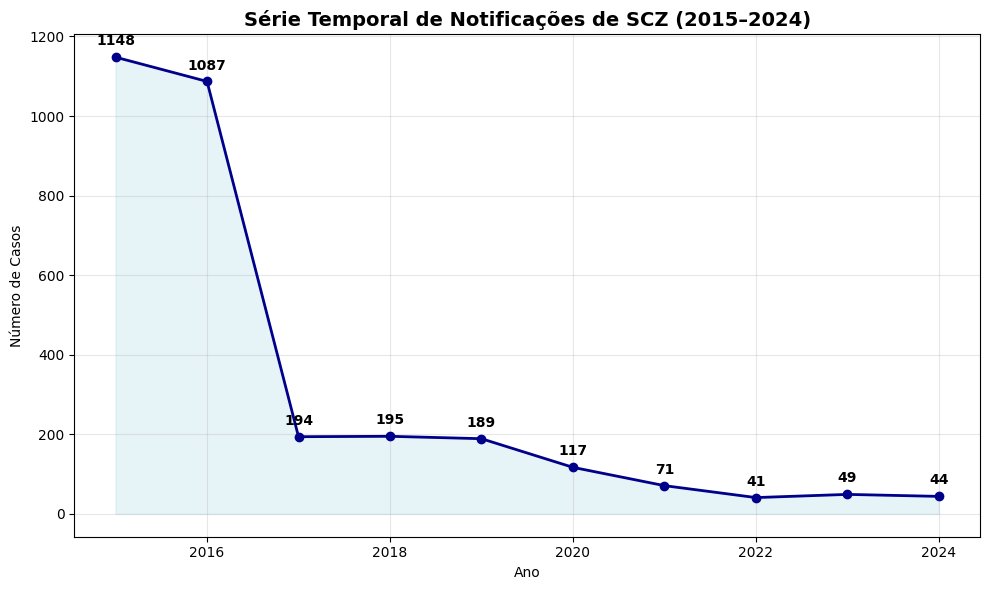

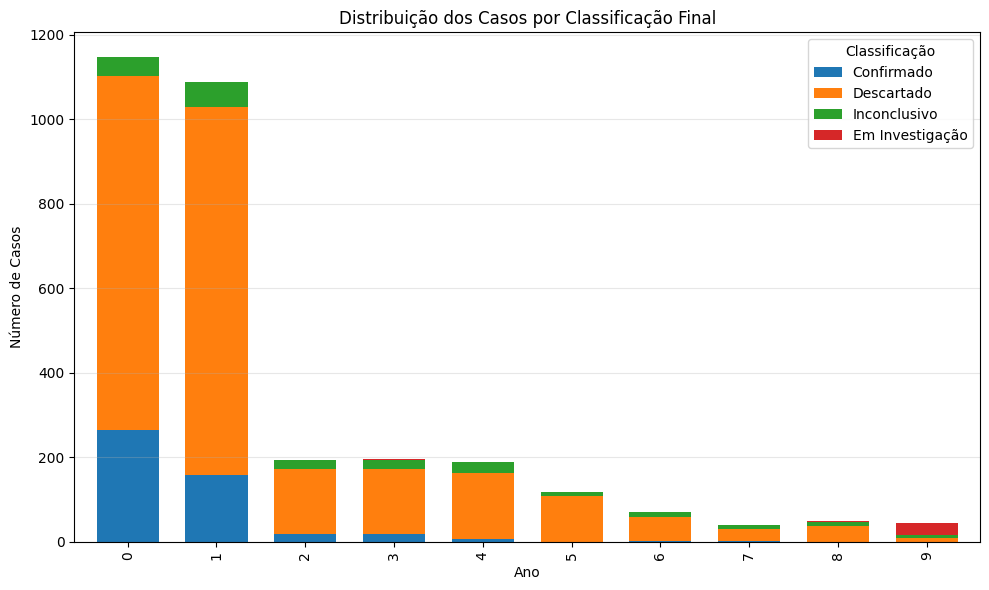

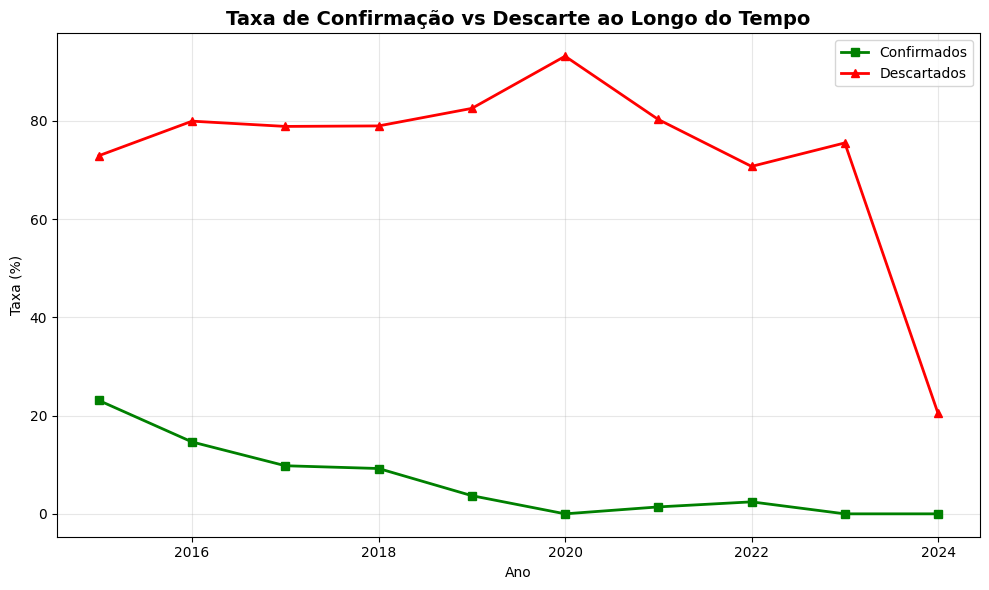

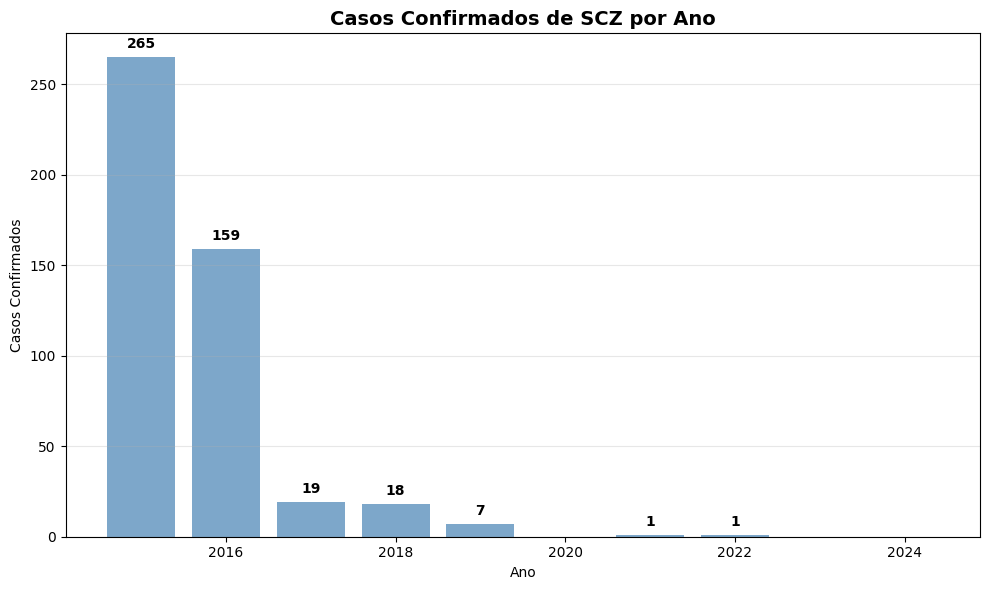

In [29]:
import matplotlib.pyplot as plt

# Série temporal de notificações
plt.figure(figsize=(10, 6))
plt.plot(df_serie['Ano'], df_serie['Total'], marker='o', linewidth=2, color='darkblue')
plt.fill_between(df_serie['Ano'], df_serie['Total'], alpha=0.3, color='lightblue')
plt.title('Série Temporal de Notificações de SCZ (2015–2024)', fontsize=14, fontweight='bold')
plt.xlabel('Ano')
plt.ylabel('Número de Casos')
plt.grid(True, alpha=0.3)
for i, v in enumerate(df_serie['Total']):
    plt.text(df_serie['Ano'][i], v + 30, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

# Distribuição dos casos por classificação final
df_serie[['Confirmado', 'Descartado', 'Inconclusivo', 'Em Investigação']].plot(
    kind='bar', stacked=True, figsize=(10, 6), width=0.7,
    title='Distribuição dos Casos por Classificação Final'
)
plt.xlabel('Ano')
plt.ylabel('Número de Casos')
plt.legend(title='Classificação')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Taxas de confirmação e descarte
plt.figure(figsize=(10, 6))
plt.plot(df_serie['Ano'], df_serie['Taxa_Confirmacao_%'], marker='s', linewidth=2,
         color='green', label='Confirmados')
plt.plot(df_serie['Ano'], df_serie['Taxa_Descarte_%'], marker='^', linewidth=2,
         color='red', label='Descartados')
plt.title('Taxa de Confirmação vs Descarte ao Longo do Tempo', fontsize=14, fontweight='bold')
plt.xlabel('Ano')
plt.ylabel('Taxa (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Casos confirmados por ano
plt.figure(figsize=(10, 6))
plt.bar(df_serie['Ano'], df_serie['Confirmado'], color='steelblue', alpha=0.7)
for i, v in enumerate(df_serie['Confirmado']):
    if v > 0:
        plt.text(df_serie['Ano'][i], v + 5, str(v), ha='center', fontweight='bold')
plt.title('Casos Confirmados de SCZ por Ano', fontsize=14, fontweight='bold')
plt.xlabel('Ano')
plt.ylabel('Casos Confirmados')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()



2. ANÁLISE ESPACIAL - DISTRIBUIÇÃO POR REGIÃO DE SAÚDE

Distribuição Regional:
Região de Saúde  Confirmado (N)  Total (N)  Confirmado (%)
              I             245       1303            52.0
             II              28        144             5.9
            III              22        153             4.7
             IV              75        404            15.9
              V              11        255             2.3
             VI              28        170             5.9
            VII               2         52             0.4
           VIII              13        134             2.8
             IX              19        182             4.0
              X               5        113             1.1
             XI               8         93             1.7
            XII              15        132             3.2

Top 5 Regiões com Mais Casos Confirmados:
Região de Saúde  Confirmado (N)  Taxa_Confirmacao
              I             245             18.80
          

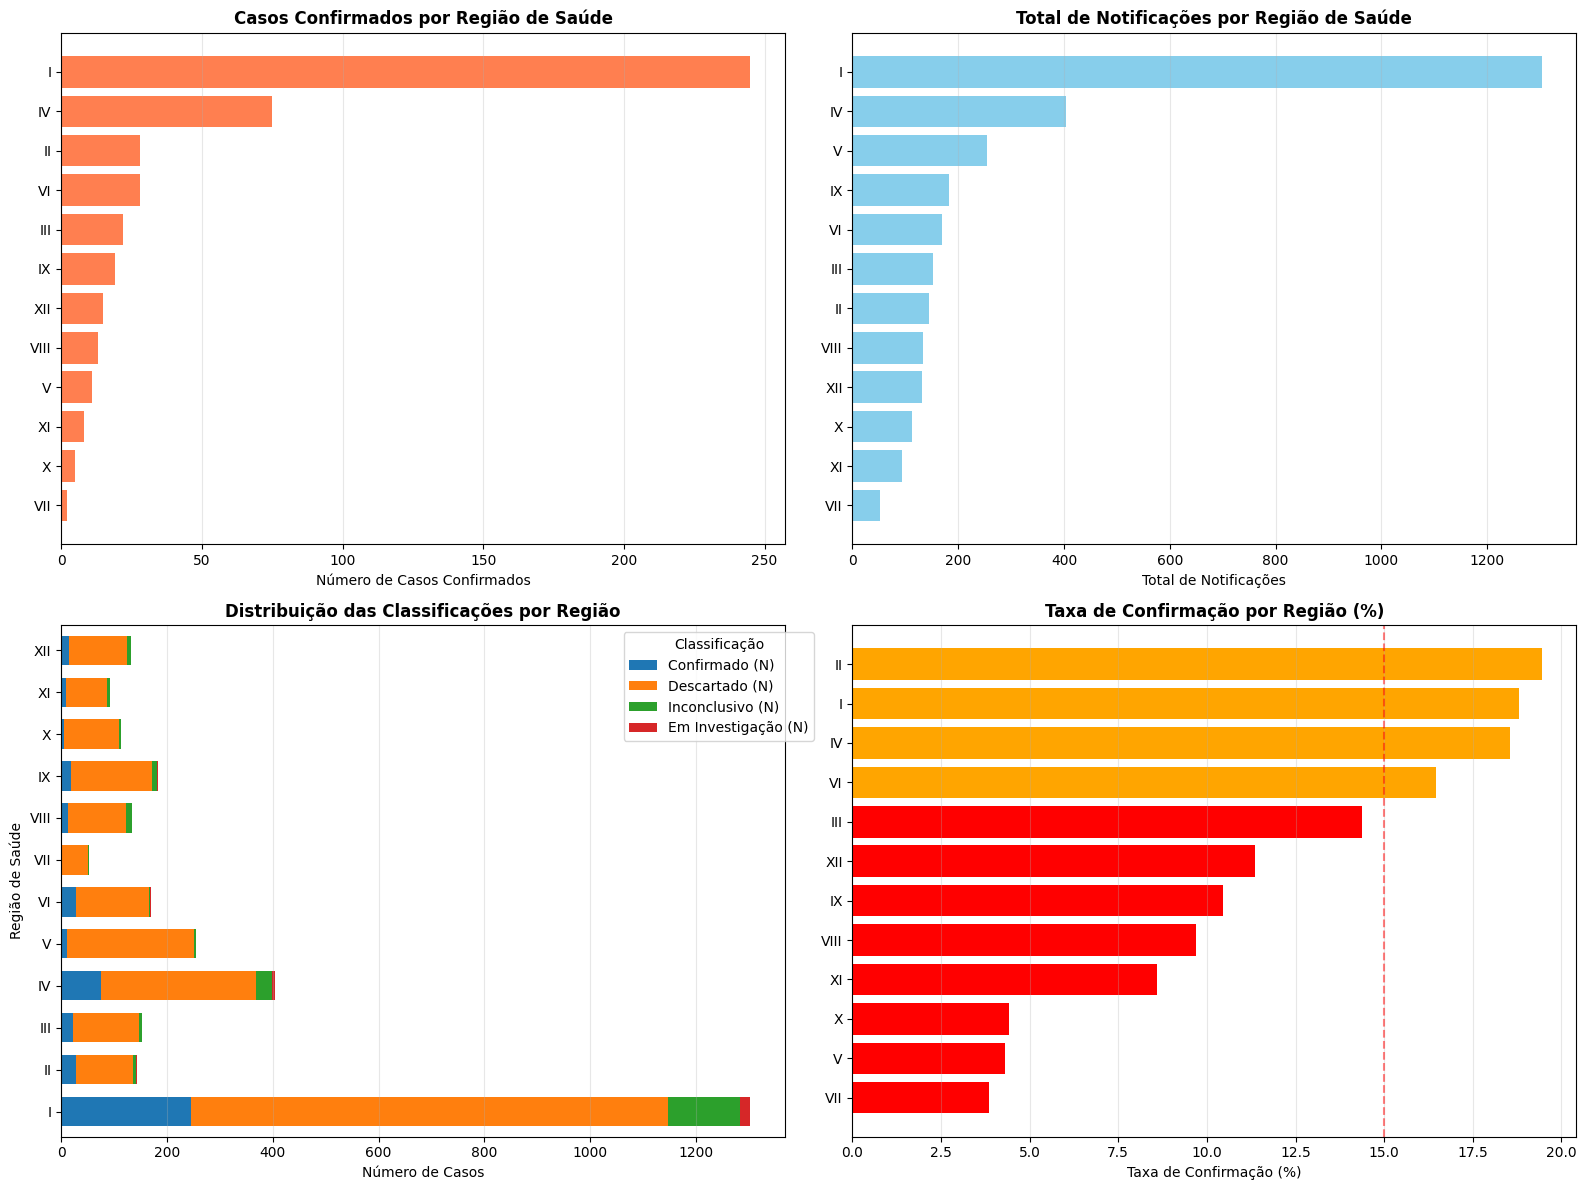

In [33]:
# 3. ANÁLISE ESPACIAL POR REGIÃO DE SAÚDE
print("\n" + "="*80)
print("2. ANÁLISE ESPACIAL - DISTRIBUIÇÃO POR REGIÃO DE SAÚDE")
print("="*80)

# Preparar dados regionais (excluir total)
df_reg = df_regional[df_regional['Região de Saúde'] != 'Pernambuco'].copy()

print("\nDistribuição Regional:")
print(df_reg[['Região de Saúde', 'Confirmado (N)', 'Total (N)', 'Confirmado (%)']].to_string(index=False))

# Calcular incidência relativa
df_reg['Taxa_Confirmacao'] = (df_reg['Confirmado (N)'] / df_reg['Total (N)'] * 100).round(2)

print("\nTop 5 Regiões com Mais Casos Confirmados:")
top5_confirmados = df_reg.nlargest(5, 'Confirmado (N)')[['Região de Saúde', 'Confirmado (N)', 'Taxa_Confirmacao']]
print(top5_confirmados.to_string(index=False))

print("\nTop 5 Regiões com Maior Taxa de Confirmação:")
top5_taxa = df_reg.nlargest(5, 'Taxa_Confirmacao')[['Região de Saúde', 'Confirmado (N)', 'Taxa_Confirmacao']]
print(top5_taxa.to_string(index=False))

# Visualização espacial
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Casos confirmados por região
df_reg_sorted = df_reg.sort_values('Confirmado (N)', ascending=True)
axes[0, 0].barh(df_reg_sorted['Região de Saúde'], df_reg_sorted['Confirmado (N)'], color='coral')
axes[0, 0].set_title('Casos Confirmados por Região de Saúde', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Número de Casos Confirmados')
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Gráfico 2: Total de notificações
df_reg_sorted2 = df_reg.sort_values('Total (N)', ascending=True)
axes[0, 1].barh(df_reg_sorted2['Região de Saúde'], df_reg_sorted2['Total (N)'], color='skyblue')
axes[0, 1].set_title('Total de Notificações por Região de Saúde', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Total de Notificações')
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Gráfico 3: Proporção de classificações
df_class = df_reg[['Região de Saúde', 'Confirmado (N)', 'Descartado (N)', 'Inconclusivo (N)', 'Em Investigação (N)']].set_index('Região de Saúde')
df_class.plot(kind='barh', stacked=True, ax=axes[1, 0], width=0.7)
axes[1, 0].set_title('Distribuição das Classificações por Região', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Número de Casos')
axes[1, 0].legend(title='Classificação', bbox_to_anchor=(1.05, 1))
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Gráfico 4: Taxa de confirmação
df_reg_sorted3 = df_reg.sort_values('Taxa_Confirmacao', ascending=True)
colors = ['red' if x < 15 else 'orange' if x < 20 else 'green' for x in df_reg_sorted3['Taxa_Confirmacao']]
axes[1, 1].barh(df_reg_sorted3['Região de Saúde'], df_reg_sorted3['Taxa_Confirmacao'], color=colors)
axes[1, 1].set_title('Taxa de Confirmação por Região (%)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Taxa de Confirmação (%)')
axes[1, 1].grid(True, alpha=0.3, axis='x')
axes[1, 1].axvline(x=15, color='red', linestyle='--', alpha=0.5, label='Média PE')

plt.tight_layout()
plt.savefig('analise_espacial_scz.png', dpi=300, bbox_inches='tight')
print("\nGráfico 'analise_espacial_scz.png' salvo!")


3. ANÁLISE DE CARACTERÍSTICAS DOS CASOS

👥 Distribuição por Sexo:
    Variáveis    N    %
     Feminino 1903 60.7
    Masculino 1198 38.2
Não informado   34  1.1

🧠 Distribuição por Presença de Microcefalia:
                               Variáveis    N    %
Não atende às definições de microcefalia 1257 40.1
                            Microcefalia  939 30.0
                     Microcefalia severa  669 21.3
                                Ignorado  270  8.6

📋 Distribuição por Tipo de Notificação:
                                                Variáveis    N    %
Criança com microcefalia e/ou alteração do SNC (>28 dias)  256  8.2
                Recém-nascido com microcefalia (≤28 dias) 2814 89.8
         Natimorto com microcefalia e/ou alteração do SNC   64  2.0
                                            Feto em risco    1  0.0


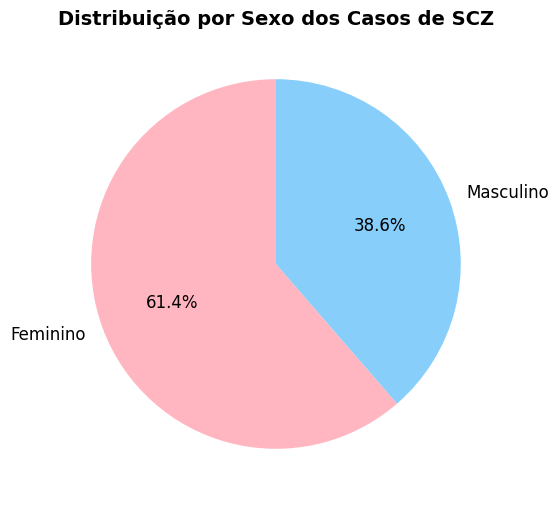

[✓] Gráfico 1 salvo como 'grafico1_scz_sexo.png'


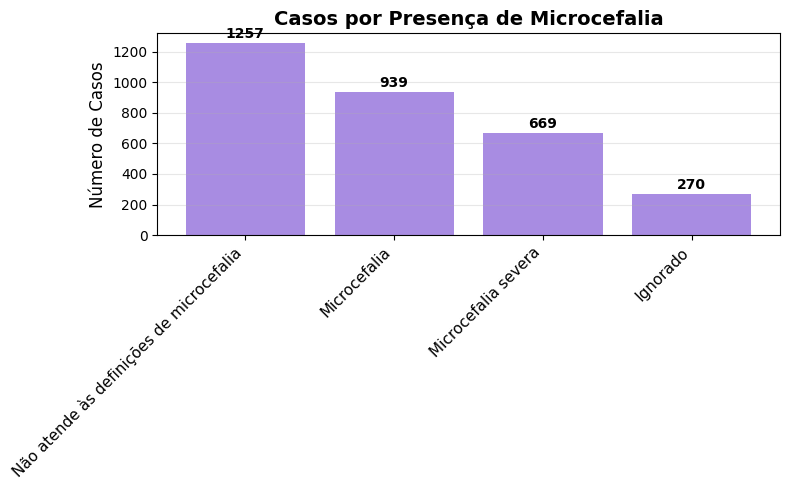

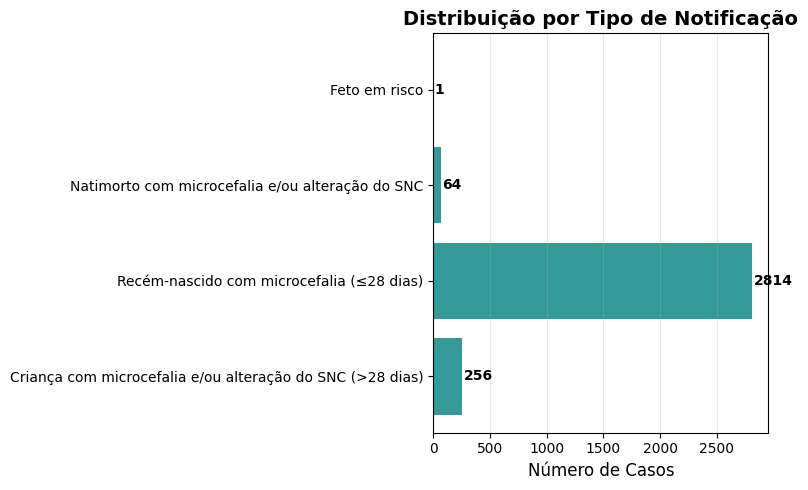

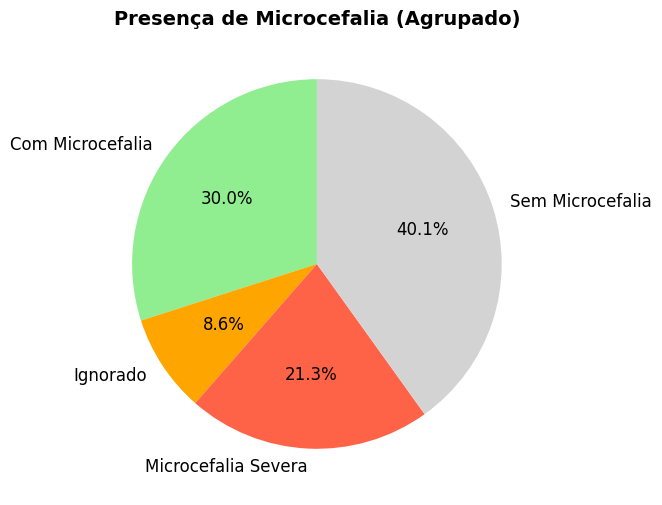

[✓] Gráfico 4 salvo como 'grafico4_scz_microcefalia_agrupado.png'


In [36]:
# 4. ANÁLISE DE CARACTERÍSTICAS E FATORES ASSOCIADOS (versão com gráficos separados)

print("3. ANÁLISE DE CARACTERÍSTICAS DOS CASOS")

# Análise de sexo
df_sexo = df_caracteristicas[df_caracteristicas['Categoria'].str.contains('Sexo')].copy()
print("\n👥 Distribuição por Sexo:")
print(df_sexo[['Variáveis', 'N', '%']].to_string(index=False))

# Análise de microcefalia
df_micro = df_caracteristicas[df_caracteristicas['Categoria'].str.contains('Presença')].copy()
print("\n🧠 Distribuição por Presença de Microcefalia:")
print(df_micro[['Variáveis', 'N', '%']].to_string(index=False))

# Análise de tipo de notificação
df_tipo = df_caracteristicas[df_caracteristicas['Categoria'].str.contains('Tipo')].copy()
print("\n📋 Distribuição por Tipo de Notificação:")
print(df_tipo[['Variáveis', 'N', '%']].to_string(index=False))

# GRÁFICO 1: DISTRIBUIÇÃO POR SEXO
sexo_data = df_sexo[df_sexo['Variáveis'] != 'Não informado']

plt.figure(figsize=(6, 6))
plt.pie(sexo_data['N'], labels=sexo_data['Variáveis'], autopct='%1.1f%%',
        startangle=90, colors=['#ffb6c1', '#87cefa'], textprops={'fontsize': 12})
plt.title('Distribuição por Sexo dos Casos de SCZ', fontsize=14, fontweight='bold')
plt.savefig('grafico1_scz_sexo.png', dpi=300, bbox_inches='tight')
plt.show()
print("[✓] Gráfico 1 salvo como 'grafico1_scz_sexo.png'")


# GRÁFICO 2: PRESENÇA DE MICROCEFALIA
plt.figure(figsize=(8, 5))
bars = plt.bar(df_micro['Variáveis'], df_micro['N'], color='mediumpurple', alpha=0.8)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.title('Casos por Presença de Microcefalia', fontsize=14, fontweight='bold')
plt.ylabel('Número de Casos', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
             str(int(bar.get_height())), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.savefig('grafico2_scz_microcefalia.png', dpi=300, bbox_inches='tight')
plt.show()


# GRÁFICO 3: TIPO DE NOTIFICAÇÃO
plt.figure(figsize=(8, 5))
bars = plt.barh(df_tipo['Variáveis'], df_tipo['N'], color='teal', alpha=0.8)
plt.title('Distribuição por Tipo de Notificação', fontsize=14, fontweight='bold')
plt.xlabel('Número de Casos', fontsize=12)
plt.grid(True, alpha=0.3, axis='x')
for bar in bars:
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2,
             str(int(bar.get_width())), va='center', fontweight='bold')
plt.tight_layout()
plt.savefig('grafico3_scz_tipo_notificacao.png', dpi=300, bbox_inches='tight')
plt.show()

# GRÁFICO 4: MICROCEFALIA (AGRUPADO SIMPLIFICADO)
micro_simples = df_micro.copy()
micro_simples['Grupo'] = micro_simples['Variáveis'].apply(
    lambda x: 'Sem Microcefalia' if 'Não atende' in x else
              'Com Microcefalia' if 'Microcefalia' in x and 'severa' not in x else
              'Microcefalia Severa' if 'severa' in x else 'Ignorado'
)
grupos = micro_simples.groupby('Grupo')['N'].sum()

plt.figure(figsize=(6, 6))
plt.pie(grupos, labels=grupos.index, autopct='%1.1f%%',
        startangle=90, colors=['#90ee90', '#ffa500', '#ff6347', '#d3d3d3'],
        textprops={'fontsize': 12})
plt.title('Presença de Microcefalia (Agrupado)', fontsize=14, fontweight='bold')
plt.savefig('grafico4_scz_microcefalia_agrupado.png', dpi=300, bbox_inches='tight')
plt.show()
print("[✓] Gráfico 4 salvo como 'grafico4_scz_microcefalia_agrupado.png'")


5. DASHBOARD RESUMO - INDICADORES PRINCIPAIS


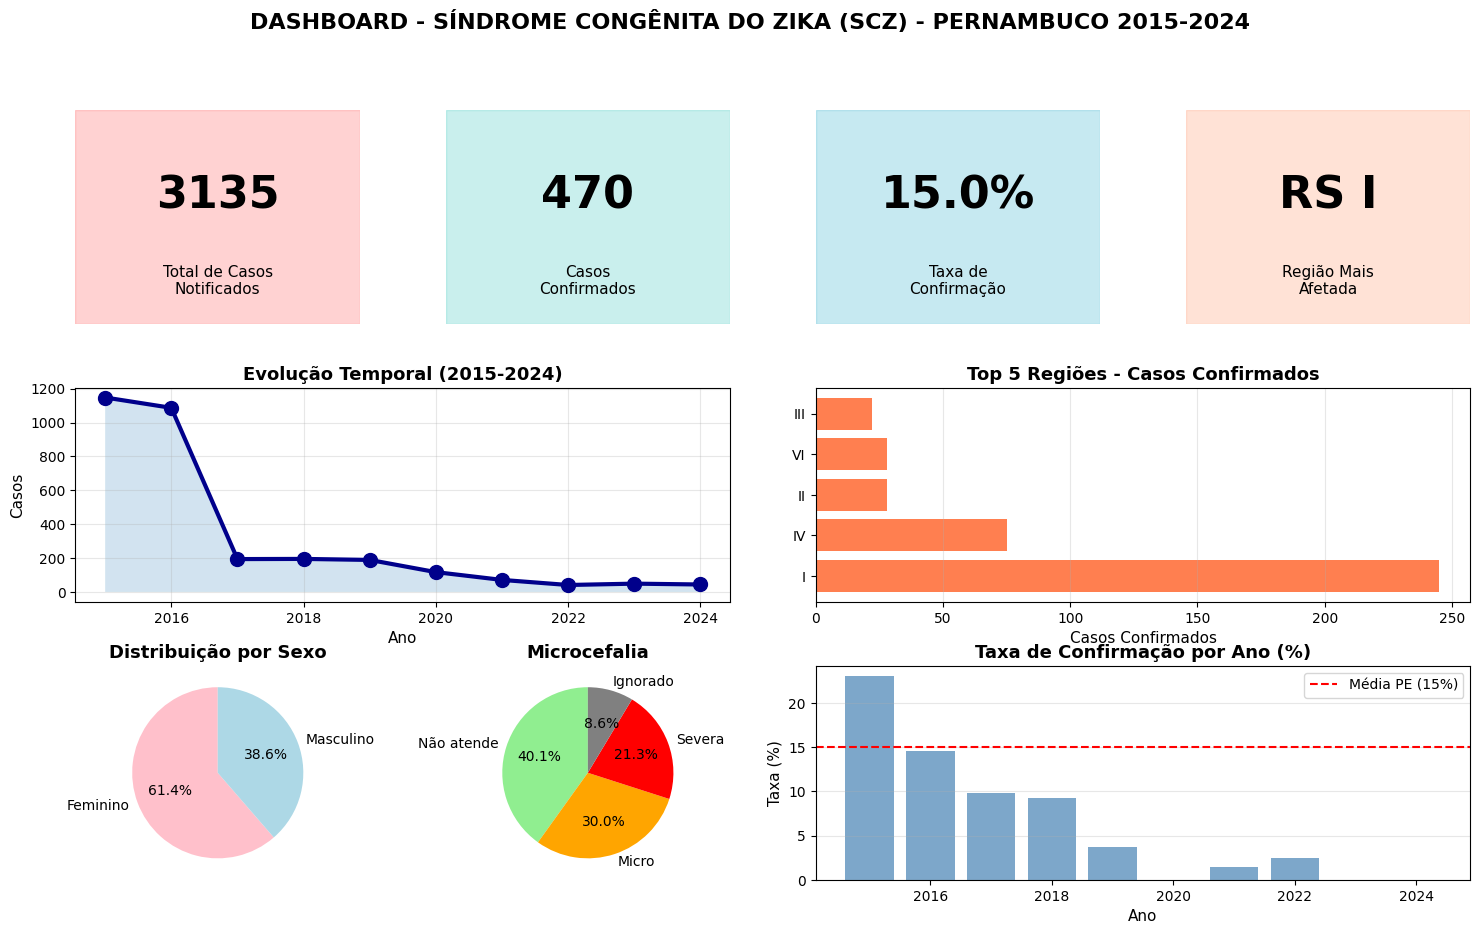

In [37]:
print("5. DASHBOARD RESUMO - INDICADORES PRINCIPAIS")
# Redefine df_reg at the beginning of the cell
df_reg = df_regional[df_regional['Região de Saúde'] != 'Pernambuco'].copy()

fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)

# Cards superiores com indicadores
colors_cards = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
indicators = [
    ('Total de Casos\nNotificados', df_serie['Total'].sum()),
    ('Casos\nConfirmados', df_serie['Confirmado'].sum()),
    ('Taxa de\nConfirmação', f"{(df_serie['Confirmado'].sum()/df_serie['Total'].sum()*100):.1f}%"),
    ('Região Mais\nAfetada', f"RS {df_reg.loc[df_reg['Confirmado (N)'].idxmax(), 'Região de Saúde']}")
]

for i, (label, value) in enumerate(indicators):
    ax = fig.add_subplot(gs[0, i])
    ax.text(0.5, 0.6, str(value), ha='center', va='center', fontsize=32, fontweight='bold')
    ax.text(0.5, 0.2, label, ha='center', va='center', fontsize=11)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    ax.set_facecolor(colors_cards[i])
    ax.add_patch(plt.Rectangle((0, 0), 1, 1, fill=True, color=colors_cards[i], alpha=0.3))

# Gráfico 1: Linha temporal
ax1 = fig.add_subplot(gs[1, :2])
ax1.plot(df_serie['Ano'], df_serie['Total'], marker='o', linewidth=3, markersize=10, color='darkblue')
ax1.fill_between(df_serie['Ano'], df_serie['Total'], alpha=0.2)
ax1.set_title('Evolução Temporal (2015-2024)', fontsize=13, fontweight='bold')
ax1.set_xlabel('Ano', fontsize=11)
ax1.set_ylabel('Casos', fontsize=11)
ax1.grid(True, alpha=0.3)

# Gráfico 2: Top 5 regiões
ax2 = fig.add_subplot(gs[1, 2:])
top5 = df_reg.nlargest(5, 'Confirmado (N)')
ax2.barh(top5['Região de Saúde'], top5['Confirmado (N)'], color='coral')
ax2.set_title('Top 5 Regiões - Casos Confirmados', fontsize=13, fontweight='bold')
ax2.set_xlabel('Casos Confirmados', fontsize=11)
ax2.grid(True, alpha=0.3, axis='x')

# Gráfico 3: Sexo
ax3 = fig.add_subplot(gs[2, 0])
sexo_clean = df_sexo[df_sexo['Variáveis'] != 'Não informado']
ax3.pie(sexo_clean['N'], labels=sexo_clean['Variáveis'], autopct='%1.1f%%',
        colors=['pink', 'lightblue'], startangle=90)
ax3.set_title('Distribuição por Sexo', fontsize=13, fontweight='bold')

# Gráfico 4: Microcefalia
ax4 = fig.add_subplot(gs[2, 1])
micro_values = df_micro['N'].values
micro_labels = ['Não atende', 'Micro', 'Severa', 'Ignorado']
colors_micro = ['lightgreen', 'orange', 'red', 'gray']
ax4.pie(micro_values, labels=micro_labels, autopct='%1.1f%%', colors=colors_micro, startangle=90)
ax4.set_title('Microcefalia', fontsize=13, fontweight='bold')

# Gráfico 5: Taxa de confirmação temporal
ax5 = fig.add_subplot(gs[2, 2:])
ax5.bar(df_serie['Ano'], df_serie['Taxa_Confirmacao_%'], color='steelblue', alpha=0.7)
ax5.axhline(y=15, color='red', linestyle='--', label='Média PE (15%)')
ax5.set_title('Taxa de Confirmação por Ano (%)', fontsize=13, fontweight='bold')
ax5.set_xlabel('Ano', fontsize=11)
ax5.set_ylabel('Taxa (%)', fontsize=11)
ax5.legend()
ax5.grid(True, alpha=0.3, axis='y')

plt.suptitle('DASHBOARD - SÍNDROME CONGÊNITA DO ZIKA (SCZ) - PERNAMBUCO 2015-2024',
             fontsize=16, fontweight='bold', y=0.98)
plt.savefig('dashboard_scz_completo.png', dpi=300, bbox_inches='tight')